In [3]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from matplotlib import font_manager, rc
import warnings
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import *
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report
# !pip install xgboost
warnings.filterwarnings('ignore')
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')

fm.get_fontconfig_fonts()
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from xgboost import plot_importance
%matplotlib inline


In [4]:
data = pd.read_csv('train.csv' , encoding='cp949')
data.head(2)

,custid,gender,amount,num_buy,sum_buy,creditcard,brand,come,incomeproduct,weekend,fall,winter,spring,summer,morning,dinner,afternoon,category
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid           5000 non-null int64
gender           5000 non-null int64
amount           5000 non-null int64
num_buy          5000 non-null int64
sum_buy          5000 non-null int64
creditcard       5000 non-null float64
brand            5000 non-null int64
come             5000 non-null int64
incomeproduct    5000 non-null float64
weekend          5000 non-null float64
fall             4055 non-null float64
winter           4103 non-null float64
spring           4311 non-null float64
summer           3978 non-null float64
morning          3558 non-null float64
dinner           4033 non-null float64
afternoon        4855 non-null float64
category         5000 non-null object
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [6]:
data.describe()

,custid,gender,amount,num_buy,sum_buy,creditcard,brand,come,incomeproduct,weekend,fall,winter,spring,summer,morning,dinner,afternoon
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4055.000000,4103.000000,4311.000000,3978.000000,3558.000000,4033.000000,4855.000000
mean,25200.496600,0.304200,3.360421e+06,34.538400,102564.0746,1.915660,17.368800,18.054800,17.989860,38.571880,10.170160,9.911772,10.572489,11.364002,8.678471,9.210265,21.559011
std,14376.680764,0.460114,5.088433e+06,40.109424,79091.0458,0.730558,14.582432,19.369182,19.483598,24.509818,11.316941,10.785779,11.745474,12.665271,12.734328,12.351998,26.484375
min,18.000000,0.000000,-1.237971e+06,1.000000,-72822.0000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12835.750000,0.000000,7.223850e+05,10.000000,54811.0000,1.400000,7.000000,6.000000,5.000000,22.200000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,5.000000
50%,25345.000000,0.000000,1.806748e+06,21.000000,82201.5000,1.800000,13.000000,12.000000,12.500000,34.850000,6.000000,6.000000,7.000000,7.000000,4.000000,5.000000,13.000000
75%,37584.250000,1.000000,4.030409e+06,44.000000,124142.7500,2.200000,24.000000,23.000000,25.000000,50.000000,13.000000,13.000000,14.000000,15.000000,10.000000,11.000000,28.000000
max,49993.000000,1.000000,9.286883e+07,491.000000,926117.0000,10.000000,134.000000,249.000000,100.000000,100.000000,130.000000,113.000000,128.000000,121.000000,174.000000,167.000000,366.000000


- ## 결측값 확인 & 대체

In [7]:
data.isnull().sum().sum()

6107

In [8]:
dataP = data.copy()

In [9]:
# 결측값 0 집어넣기
dataP = dataP.fillna(0)
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid           5000 non-null int64
gender           5000 non-null int64
amount           5000 non-null int64
num_buy          5000 non-null int64
sum_buy          5000 non-null int64
creditcard       5000 non-null float64
brand            5000 non-null int64
come             5000 non-null int64
incomeproduct    5000 non-null float64
weekend          5000 non-null float64
fall             5000 non-null float64
winter           5000 non-null float64
spring           5000 non-null float64
summer           5000 non-null float64
morning          5000 non-null float64
dinner           5000 non-null float64
afternoon        5000 non-null float64
category         5000 non-null object
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


- ## 주구매코너별 구매자수 시각화

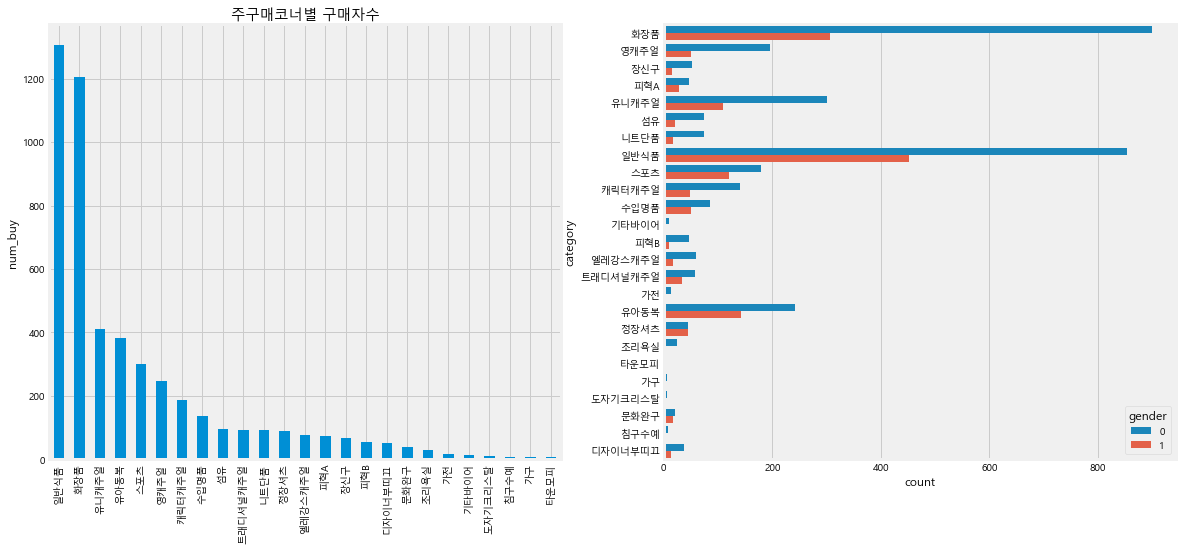

In [10]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['category'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('주구매코너별 구매자수')
ax[0].set_ylabel('num_buy')
sns.countplot(y='category', hue='gender', data=data, ax=ax[1])
plt.show()

- ### 범주형 데이터 정수형 데이터로 변환

In [11]:
obj = ['category']
dataP[obj] = data[obj].apply(lambda x: x.astype('category').cat.codes)

In [12]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid           5000 non-null int64
gender           5000 non-null int64
amount           5000 non-null int64
num_buy          5000 non-null int64
sum_buy          5000 non-null int64
creditcard       5000 non-null float64
brand            5000 non-null int64
come             5000 non-null int64
incomeproduct    5000 non-null float64
weekend          5000 non-null float64
fall             5000 non-null float64
winter           5000 non-null float64
spring           5000 non-null float64
summer           5000 non-null float64
morning          5000 non-null float64
dinner           5000 non-null float64
afternoon        5000 non-null float64
category         5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [13]:
#dataPT = dataPP.copy()

dfX = dataP.drop(['custid','gender'], axis=1)
dfy = dataP['gender']
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=42)

In [14]:
display(X_train.shape, X_test.shape)
X_train.head()

(3750, 16)

(1250, 16)

,amount,num_buy,sum_buy,creditcard,brand,come,incomeproduct,weekend,fall,winter,spring,summer,morning,dinner,afternoon,category
4884,2398600,36,66628,2.2,25,18,25.0,22.2,8.0,6.0,2.0,20.0,4.0,19.0,13.0,3
3163,1439500,16,89969,2.6,10,10,6.2,30.0,3.0,2.0,8.0,3.0,1.0,2.0,13.0,12
490,120000,3,40000,1.7,2,1,0.0,100.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,11
862,697369,25,27895,1.4,12,22,12.0,68.2,6.0,5.0,5.0,9.0,13.0,8.0,4.0,14
1740,6061300,40,151532,1.0,21,22,17.5,77.3,5.0,15.0,15.0,5.0,3.0,13.0,24.0,11


# 샘플링 및 베스트 모델 확인

In [15]:
from imblearn.combine import SMOTETomek

In [16]:
X_resampled, y_resampled = SMOTETomek(random_state=0).fit_sample(dfX, dfy)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

In [17]:
# 파라미터 서치
def bestGBDTNextModel(model, isKfold, nfold, searchCV, Xtrain, ytrain, Xtest, ytest, nIter, scoring, errScore, verbose, nJobs):
    # GridSearchCV을 위해 파라미터 값을 제한함.
    grd_prams = {}
    classifier = XGBClassifier(random_state=0, objective='binary:logistic')
    cv = KFold(n_splits=nfold, shuffle=True, random_state=0)
    
    if model == 'LGBM':
        # 그래디언트 부스팅 결정 트리(GBDT)    
        grd_prams.update({'max_depth': [50, 100],
              'learning_rate' : [0.01, 0.05],
              'num_leaves': [150, 200],
              'n_estimators': [300, 400],
              'num_boost_round':[4000, 5000],
              'subsample': [0.5, 1],
              'reg_alpha': [0.01, 0.1],
              'reg_lambda': [0.01, 0.1],
              'min_data_in_leaf': [20, 30],
              'lambda_l1': [0.01, 0.1],
              'lambda_l2': [0.01, 0.1]
            })
        
        
        classifier = LGBMClassifier(random_state=0, boosting_type='gbdt', objective='binary', metric='auc')
        
    
    if isKfold == False:
        cv = StratifiedShuffleSplit(n_splits=nfold, test_size=0.2, random_state=0)
    
    grid_ = RandomizedSearchCV(classifier, param_distributions=grd_prams, n_iter=nIter, scoring=scoring, error_score=errScore, verbose=verbose, n_jobs=nJobs, cv=cv)

    # 속도 이슈
    if searchCV == 'GRID': 
        grid_ = GridSearchCV(classifier, param_grid=grd_prams, n_jobs=nJobs, scoring=scoring, verbose=verbose, cv=cv)
    
    grid_.fit(Xtrain, ytrain)
    score_ = grid_.score(Xtest, ytest)
    
    print("{} grid_.best_score {}".format(model, np.round(grid_.best_score_,3)))
    print("{} grid_.best_score {}".format(model, np.round(score_,3)))
    print("{} best_estimator {}".format(model, grid_.best_estimator_))

    return grid_.best_params_

In [18]:
#best model 선택 LGBM

best_param1 = bestGBDTNextModel('LGBM', False, 5, 'RANDOM', X_train, y_train, X_test, y_test, 15, 'roc_auc', 0, 3, -1)
lgbm1 = LGBMClassifier(**best_param1)
score_lgbm1 = lgbm1.fit(X_train, y_train).score(X_test, y_test)
print("score_lgbm1 ::: {}".format(score_lgbm1))
print("-----------------------------------")
y_lgbm1 = lgbm1.predict(X_test)
print(classification_report(y_test, y_lgbm1))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  5.1min finished


LGBM grid_.best_score 0.847
LGBM grid_.best_score 0.865
LGBM best_estimator LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lambda_l1=0.01, lambda_l2=0.01,
               learning_rate=0.05, max_depth=100, metric='auc',
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=400,
               n_jobs=-1, num_boost_round=5000, num_leaves=200,
               objective='binary', random_state=0, reg_alpha=0.01,
               reg_lambda=0.01, silent=True, subsample=1,
               subsample_for_bin=200000, subsample_freq=0)
score_lgbm1 ::: 0.7904761904761904
-----------------------------------
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       776
           1       0.79      0.77      0.78       694

    accuracy                           0.79      1470
   macro avg       0.79      0.79     

#  전개

In [21]:
test_data = pd.read_csv('test.csv' , encoding='cp949')
test_data.head(1)

,custid,amount,num_buy,sum_buy,creditcard,brand,come,incomeproduct,weekend,fall,winter,spring,summer,morning,dinner,afternoon,category
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구


In [22]:
display(dataP.info())
print("")
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid           5000 non-null int64
gender           5000 non-null int64
amount           5000 non-null int64
num_buy          5000 non-null int64
sum_buy          5000 non-null int64
creditcard       5000 non-null float64
brand            5000 non-null int64
come             5000 non-null int64
incomeproduct    5000 non-null float64
weekend          5000 non-null float64
fall             5000 non-null float64
winter           5000 non-null float64
spring           5000 non-null float64
summer           5000 non-null float64
morning          5000 non-null float64
dinner           5000 non-null float64
afternoon        5000 non-null float64
category         5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
custid           5000 non-null int64
amount           5000 non-null int64
num_buy          5000 non-null int64
sum_buy          5000 non-null int64
creditcard       5000 non-null float64
brand            5000 non-null int64
come             5000 non-null int64
incomeproduct    5000 non-null float64
weekend          5000 non-null float64
fall             4052 non-null float64
winter           4089 non-null float64
spring           4319 non-null float64
summer           4009 non-null float64
morning          3608 non-null float64
dinner           3975 non-null float64
afternoon        4861 non-null float64
category         5000 non-null object
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


None

- ### Test data 결측값 0으로 변환 % 범주형 데이터 수치형 데이터 변환

In [23]:
test_data.isnull().sum().sum()
test_dataF = test_data.fillna(0)
print(test_data.isnull().sum().sum())
print(test_dataF.isnull().sum())

6087
custid           0
amount           0
num_buy          0
sum_buy          0
creditcard       0
brand            0
come             0
incomeproduct    0
weekend          0
fall             0
winter           0
spring           0
summer           0
morning          0
dinner           0
afternoon        0
category         0
dtype: int64


In [24]:
obj = ['category']
test_dataF[obj] = test_dataF[obj].apply(lambda x: x.astype('category').cat.codes)

In [25]:
# test_dataF.drop('custid',axis=1, inplace=True)

In [26]:
test_dataF.drop('custid',axis=1, inplace=True)

best_model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lambda_l1=0.01, lambda_l2=0.01,
               learning_rate=0.01, max_depth=50, metric='auc',
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=300,
               n_jobs=-1, num_boost_round=4000, num_leaves=150,
               objective='binary', random_state=0, reg_alpha=0.1,
               reg_lambda=0.01, silent=True, subsample=1,
               subsample_for_bin=200000, subsample_freq=0)
best_model.fit(X_train, y_train)
best_model.score(X_test,y_test)

0.7891156462585034

In [30]:
new = test_dataF.copy()
print(best_model.predict_proba(new.loc[:,'amount':'category']))
new['gender'] = best_model.predict(new.loc[:,'amount':'category'])
new['pred_prob'] = best_model.predict_proba(new.loc[:,'amount':'category'])[:,1]
new

[[0.87017854 0.12982146]
 [0.96961066 0.03038934]
 [0.98491927 0.01508073]
 ...
 [0.98625571 0.01374429]
 [0.99580385 0.00419615]
 [0.07121989 0.92878011]]


,amount,num_buy,sum_buy,creditcard,brand,come,incomeproduct,weekend,fall,winter,spring,summer,morning,dinner,afternoon,category,gender,pred_prob
0,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,0,0.129821
1,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13,0,0.030389
2,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13,0,0.015081
3,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,0.0,4.0,42.0,8,0,0.025205
4,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,0.0,5.0,3.0,0.0,0.0,26.0,9,1,0.568544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,670690,5,134138,1.4,5,4,0.0,75.0,1.0,2.0,2.0,0.0,1.0,1.0,3.0,14,0,0.036060
4996,628700,13,48362,1.8,10,7,7.7,42.9,0.0,5.0,1.0,7.0,0.0,3.0,10.0,17,0,0.013801
4997,960923,12,80077,1.8,7,7,0.0,42.9,4.0,1.0,6.0,1.0,0.0,0.0,12.0,14,0,0.013744
4998,786600,14,56186,1.7,12,9,14.3,55.6,0.0,7.0,4.0,3.0,2.0,4.0,8.0,24,0,0.004196


In [31]:
gender = new[['gender']]      #가입할 확율이 70%가 넘는 고객만 추출
gender.to_csv("gender.csv", encoding='utf-8',index=False)
pd.read_csv("gender.csv").tail()

,gender
4995,0
4996,0
4997,0
4998,0
4999,1


In [32]:
# 여성이 남성의 약 3.65배로 예측되었다.
gender['gender'].value_counts()

0    3924
1    1076
Name: gender, dtype: int64